In [1]:
import pandas as pd
import plotly.express as px
import folium
import json
from IPython.display import IFrame  
import plotly.io as pio  

In [2]:
df=pd.read_csv(r'Global_Cybersecurity_Threats_2015-2024.csv')
df

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68
...,...,...,...,...,...,...,...,...,...,...
2995,UK,2021,Ransomware,Government,51.42,190694,Unknown,Social Engineering,Firewall,52
2996,Brazil,2023,SQL Injection,Telecommunications,30.28,892843,Hacker Group,Zero-day,VPN,26
2997,Brazil,2017,SQL Injection,IT,32.97,734737,Nation-state,Weak Passwords,AI-based Detection,30
2998,UK,2022,SQL Injection,IT,32.17,379954,Insider,Unpatched Software,Firewall,9


In [3]:
#COUNT DUPLICATES
df.duplicated().sum()

np.int64(0)

In [4]:
#COUNT NULL VALUES PER COLUMN
df.isnull().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [6]:
#CHANGE YEAR COLUMN FORMAT FROM INT64 TO STR
df['Year'] = df['Year'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   object 
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 234.5+ KB


In [7]:
#COUNT NUMBER OF COLUMNS AND ROWS
df.shape

(3000, 10)

**KEY FINDINGS / RESULTS | FINANCIAL IMPACT AND TRENDS**

In [8]:
#DATAFRAME FOR ANNUAL FINANCIAL LOSS
df_financial_loss_annual = df.groupby('Year')['Financial Loss (in Million $)'].sum().reset_index()
df_financial_loss_annual['Financial Loss'] = (df_financial_loss_annual['Financial Loss (in Million $)']*1e6).round(2)
df_financial_loss_annual['Financial Loss (in Billion $)'] = (df_financial_loss_annual['Financial Loss (in Million $)']/1e3).round(2)
df_financial_loss_annual

,Year,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,2015,14510.21,1.451021e+10,14.51
1,2016,13947.26,1.394726e+10,13.95
2,2017,16261.68,1.626168e+10,16.26
3,2018,14720.48,1.472048e+10,14.72
4,2019,13134.69,1.313469e+10,13.13
5,2020,15767.95,1.576795e+10,15.77
6,2021,15873.41,1.587341e+10,15.87
7,2022,15870.86,1.587086e+10,15.87
8,2023,15958.08,1.595808e+10,15.96
9,2024,15434.29,1.543429e+10,15.43


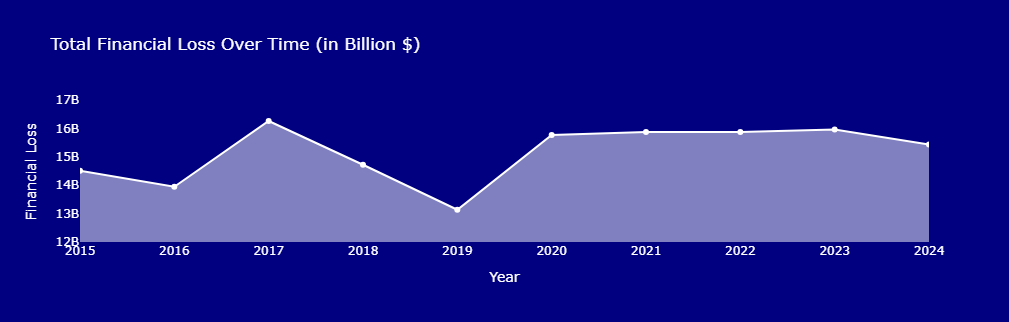

In [16]:
# AREA CHART OF TOTAL FINANCIAL LOSS OVER TIME
fig_financial_loss_annual = px.area(df_financial_loss_annual, x='Year', y='Financial Loss', 
                                    title= "<span style='color:white;'>Total Financial Loss Over Time (in Billion $)</span>",
                                    markers=True, color_discrete_sequence=['white'],
                                    width=1250, height=300)
fig_financial_loss_annual.update_layout(plot_bgcolor='Navy', paper_bgcolor='Navy',
                                       yaxis=dict(range=[12000000000,17000000000], showgrid=False),
                                       xaxis=dict(showgrid=False), font=dict(color='white'))

fig_financial_loss_annual.show()

fig_financial_loss_annual.write_image("fig_financial_loss_annual.png")  

![Plotly Graph](fig_financial_loss_annual.png)

In [10]:
#DATAFRAME FOR TOTAL FINANCIAL LOSS BY ATTACK TYPE
df_attack_type_finloss_total = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().sort_values(ascending=True).reset_index()
df_attack_type_finloss_total['Financial Loss'] = (df_attack_type_finloss_total['Financial Loss (in Million $)']*1e6).round(2)
df_attack_type_finloss_total['Financial Loss (in Billion $)'] = (df_attack_type_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_attack_type_finloss_total

,Attack Type,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Man-in-the-Middle,23550.87,2.355087e+10,23.55
1,Malware,23967.95,2.396795e+10,23.97
2,Ransomware,24479.32,2.447932e+10,24.48
3,SQL Injection,25156.56,2.515656e+10,25.16
4,Phishing,26693.29,2.669329e+10,26.69
5,DDoS,27630.92,2.763092e+10,27.63


In [11]:
# BAR GRAPH OF TOTAL FINANCIAL LOSS BY ATTACK TYPE
fig_finloss_attacktype = px.bar(df_attack_type_finloss_total, y='Attack Type', x='Financial Loss', 
                                    title= "<span style='color:white;'>Total Financial Loss by Cyberattack Type (2015-2024, in Billion $)</span>",
                                    color='Financial Loss', color_continuous_scale='Blues', 
                                    text=df_attack_type_finloss_total['Financial Loss (in Billion $)'].apply(lambda x: f"{x}B"),
                                    width=620, height=320)
fig_finloss_attacktype.update_layout(plot_bgcolor='Navy', paper_bgcolor='Navy',
                                       yaxis=dict(showgrid=False),
                                       xaxis=dict(showgrid=False), font=dict(color='white'),
                                    coloraxis_showscale=False)

fig_finloss_attacktype

In [12]:
#DATAFRAME OF FINANCIAL LOSS BY INDUSTRY
df_target_industry_finloss_total = df.groupby(['Target Industry','Year'])['Financial Loss (in Million $)'].sum().reset_index()
df_target_industry_finloss_total['Financial Loss'] = (df_target_industry_finloss_total['Financial Loss (in Million $)']*1e6).round(2)
df_target_industry_finloss_total['Financial Loss (in Billion $)'] = (df_target_industry_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_target_industry_finloss_total

,Target Industry,Year,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Banking,2015,2189.36,2.189360e+09,2.19
1,Banking,2016,1871.24,1.871240e+09,1.87
2,Banking,2017,2220.96,2.220960e+09,2.22
3,Banking,2018,2468.82,2.468820e+09,2.47
4,Banking,2019,2117.61,2.117610e+09,2.12
...,...,...,...,...,...
65,Telecommunications,2020,1970.72,1.970720e+09,1.97
66,Telecommunications,2021,2726.83,2.726830e+09,2.73
67,Telecommunications,2022,2385.68,2.385680e+09,2.39
68,Telecommunications,2023,2189.73,2.189730e+09,2.19


In [13]:
#AREA CHART OF FINANCIAL LOSS BY INDUSTRY OVER-TIME 
fig_target_industry_finloss_total = px.area(df_target_industry_finloss_total, y='Financial Loss', x='Year', 
                                         title = 'Financial Loss by Industry Over Time (2015-2024, in Billion $)', 
                                         color='Target Industry',
                                         #text = (df_target_industry_finloss_total['Financial Loss (in Billion $)'].apply(lambda x:f"{x}B")),
                                         width = 620, height=320)

fig_target_industry_finloss_total.update_layout(coloraxis_showscale=False, plot_bgcolor='navy', paper_bgcolor='navy', xaxis=dict(showgrid=False),
                                                yaxis=dict(showgrid=False),
                                                font=dict(color='white'))
fig_target_industry_finloss_total

In [14]:
#DATAFRAME OF TOTAL FINANCIAL LOSS BY COUNTRY
df_country_finloss_total = df.groupby('Country')['Financial Loss (in Million $)'].sum().reset_index()
df_country_finloss_total['Financial Loss'] = (df_country_finloss_total['Financial Loss (in Million $)']*1e3).round(2)
df_country_finloss_total['Financial Loss (in Billion $)'] = (df_country_finloss_total['Financial Loss (in Million $)']/1e3).round(2)
df_country_finloss_total['Country']= df_country_finloss_total['Country'].replace({'USA':'United States of America', 'UK':'United Kingdom'})
df_country_finloss_total

,Country,Financial Loss (in Million $),Financial Loss,Financial Loss (in Billion $)
0,Australia,15403.00,15403000.0,15.40
1,Brazil,15782.62,15782620.0,15.78
2,China,13714.47,13714470.0,13.71
3,France,14972.28,14972280.0,14.97
4,Germany,15793.24,15793240.0,15.79
5,India,14566.12,14566120.0,14.57
6,Japan,15197.34,15197340.0,15.20
7,Russia,14734.73,14734730.0,14.73
8,United Kingdom,16502.99,16502990.0,16.50
9,United States of America,14812.12,14812120.0,14.81


In [15]:
#CHOROPLETH MAP OF TOTAL FINANCIAL LOSS BY COUNTRY

import json
import folium

# Step 1: Load GeoJSON data
with open("custom.geo.json", "r", encoding="utf-8") as geojson_file:
    geojson_data = json.load(geojson_file)

# Step 2: Initialize the map
choropleth_map_finloss = folium.Map(location=[10, 0], zoom_start=2, tiles="Cartodb Positron")

# Step 3: Add Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    data=df_country_finloss_total,
    columns=["Country", "Financial Loss (in Million $)"],
    key_on="feature.properties.name",
    fill_color='Blues',
    nan_fill_color="transparent",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Financial Loss (in Million $)"
).add_to(choropleth_map_finloss)

# Step 4: Add GeoJSON layer for tooltips
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"],
        aliases=["Country: "],
        localize=True,
    ),
).add_to(choropleth_map_finloss)

# Step 5: Define top 10 affected countries
countries_finloss = [
    {"name": "Australia", "lat": -25.2744, "lon": 133.7751, "callbox_position": "right", "Financial Loss (in Billion $)": "15.40B"},
    {"name": "Brazil", "lat": -14.2350, "lon": -51.9253, "callbox_position": "right", "Financial Loss (in Billion $)": "15.78B"},
    {"name": "China", "lat": 35.8617, "lon": 104.1954, "callbox_position": "left", "Financial Loss (in Billion $)": "13.71B"},
    {"name": "France", "lat": 46.6034, "lon": 1.8883, "callbox_position": "left", "Financial Loss (in Billion $)": "14.97B"},
    {"name": "Germany", "lat": 51.1657, "lon": 10.4515, "callbox_position": "right", "Financial Loss (in Billion $)": "15.79B"},
    {"name": "India", "lat": 20.5937, "lon": 78.9629, "callbox_position": "right", "Financial Loss (in Billion $)": "14.57B"},
    {"name": "Japan", "lat": 36.2048, "lon": 138.2529, "callbox_position": "right", "Financial Loss (in Billion $)": "15.20B"},
    {"name": "Russia", "lat": 61.5240, "lon": 105.3188, "callbox_position": "right", "Financial Loss (in Billion $)": "14.73B"},
    {"name": "United Kingdom", "lat": 55.3781, "lon": -3.4360, "callbox_position": "left", "Financial Loss (in Billion $)": "16.50B"},
    {"name": "United States of America", "lat": 37.0902, "lon": -95.7129, "callbox_position": "left", "Financial Loss (in Billion $)": "14.81B"}
]

# Step 6: Add callout boxes and connecting lines
for country in countries_finloss:
    offset_lat = country["lat"] + 5
    offset_lon = country["lon"] + (40 if country["callbox_position"] == "right" else -80)

    box_html = f"""
    <div style="
        background-color: white;
        border: 1px solid black;
        border-radius: 5px;
        padding: 10px;
        width: 250px;
        height:30px;
        display:flex;
        align-items:center;
        font-size:14px;
        justify-content: center;
        box-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);">
        <b>{country['name']} ({country['Financial Loss (in Billion $)']})</b>
    </div>
    """

    folium.Marker(
        location=[offset_lat, offset_lon],
        icon=folium.DivIcon(html=box_html)
    ).add_to(choropleth_map_finloss)

    folium.PolyLine(
        locations=[[country["lat"], country["lon"]], [offset_lat, offset_lon]],
        color="black",
        weight=1
    ).add_to(choropleth_map_finloss)

# Step 7: Add summary callout box in ocean area
summary_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 400px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h4 style="margin: 0; text-align: center; color:dodgerblue;"><b>FINANCIAL LOSS BY COUNTRY</b><br>(2011-2024, in Billion $)</h4>
    <table style="width: 100%; border-collapse: collapse; font-size: 14px;">
        <thead>
            <tr style="border-bottom: 1px solid #ddd; text-align: left;">
                <th style="width: 15%;">Rank</th>
                <th style="width: 50%;">Country</th>
                <th style="width: 35%;">Loss (Billion $)</th>
            </tr>
        </thead>
        <tbody>
            <tr><td>1</td><td>United Kingdom</td><td>16.50B</td></tr>
            <tr><td>2</td><td>Brazil</td><td>15.78B</td></tr>
            <tr><td>3</td><td>Germany</td><td>15.79B</td></tr>
            <tr><td>4</td><td>Australia</td><td>15.40B</td></tr>
            <tr><td>5</td><td>Japan</td><td>15.20B</td></tr>
            <tr><td>6</td><td>France</td><td>14.97B</td></tr>
            <tr><td>7</td><td>Russia</td><td>14.73B</td></tr>
            <tr><td>8</td><td>United States of America</td><td>14.81B</td></tr>
            <tr><td>9</td><td>India</td><td>14.57B</td></tr>
            <tr><td>10</td><td>China</td><td>13.71B</td></tr>
        </tbody>
    </table>
</div>
"""

folium.Marker(
    location=[80, 270],
    icon=folium.DivIcon(html=summary_html)
).add_to(choropleth_map_finloss)

title_html = """
<div style="background-color: white; border-radius: 10px; padding: 10px; width: 600px; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.3);">
    <h3 style="margin: 0; text-align: center; color:dodgerblue;"><b>CHOROPLETH MAP OF FINANCIAL LOSS BY COUNTRY</b></h3>
"""

folium.Marker(
    location=[110, 15],
    icon=folium.DivIcon(html=title_html)
).add_to(choropleth_map_finloss)


# Step 8: Save map
choropleth_map_finloss.save("choropleth_map_with_callouts_finloss.html")
print("Map generated successfully: 'choropleth_map_with_callouts_finloss.html'")


IFrame("choropleth_map_with_callouts_finloss.html", width=1400, height=1000)  

Map generated successfully: 'choropleth_map_with_callouts_finloss.html'
